## Análisis de datos sísmicos

Script para procesar y visualizar datos sísmicos utilizados en el monitoreo de voladuras y evaluación de su efecto en el terreno circundante

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [2]:
# Datos de ejemplo
tiempo = np.linspace(0, 10, 1000)  # Tiempo en segundos
amplitud = np.sin(2 * np.pi * 10 * tiempo) + 0.5 * np.sin(2 * np.pi * 30 * tiempo)  # Amplitud de la señal sísmica

In [3]:
# Parámetros de configuración
fs = 1000  # Frecuencia de muestreo en Hz
ventana = 'hann'  # Tipo de ventana para el cálculo del espectrograma
nperseg = 256  # Longitud de la ventana en muestras
noverlap = nperseg // 2  # Superposición de ventanas en muestras
nfft = 1024  # Longitud de la FFT en muestras
escala_dB = 10  # Escala para representar el espectrograma en dB

In [4]:
# Procesamiento de datos sísmicos
frecuencias, tiempos, espectro = spectrogram(amplitud, fs=fs, window=ventana, nperseg=nperseg, noverlap=noverlap, nfft=nfft)

In [5]:
# Visualización de datos sísmicos
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

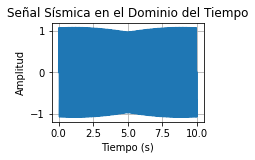

In [11]:
# Gráfico de la señal sísmica en el dominio del tiempo
plt.subplot(2, 2, 3)
plt.plot(tiempo, amplitud)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Sísmica en el Dominio del Tiempo')
plt.grid(True)

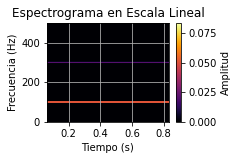

In [7]:
# Gráfico del espectrograma en escala lineal
plt.subplot(2, 2, 2)
plt.pcolormesh(tiempos, frecuencias, np.abs(espectro), shading='auto', cmap='inferno')
plt.colorbar(label='Amplitud')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma en Escala Lineal')
plt.grid(True)

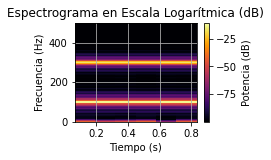

In [12]:
# Gráfico del espectrograma en escala logarítmica (dB)
plt.subplot(2, 2, 3)
plt.pcolormesh(tiempos, frecuencias, 10 * np.log10(np.abs(espectro) + 1e-10), shading='auto', cmap='inferno')
plt.colorbar(label='Potencia (dB)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma en Escala Logarítmica (dB)')
plt.grid(True)

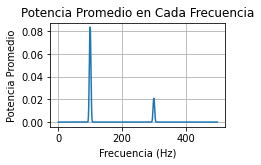

In [13]:
# Gráfico de la potencia promedio en cada frecuencia
potencia_promedio = np.mean(np.abs(espectro), axis=1)
plt.subplot(2, 2, 4)
plt.plot(frecuencias, potencia_promedio)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia Promedio')
plt.title('Potencia Promedio en Cada Frecuencia')
plt.grid(True)

plt.tight_layout()
plt.show()